<a href="https://colab.research.google.com/github/osoohynn/used-car-price-forecast/blob/main/used_car_price_forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 중고차 가격 예측하기

In [117]:
from google.colab import drive
drive.mount('/content/drive')

KeyboardInterrupt: 

In [118]:
import pandas as pd

In [119]:
# 1. 데이터 로드 및 통합 (이전과 동일)
def load_and_combine_data():
    files = ['audi.csv', 'bmw.csv', 'cclass.csv', 'focus.csv', 'ford.csv',
             'hyundi.csv', 'merc.csv', 'skoda.csv', 'toyota.csv', 'vauxhall.csv', 'vw.csv']

    dataframes = []
    for file in files:
        df = pd.read_csv(f'../content/drive/MyDrive/{file}')
        df['brand'] = files.index(file)
        dataframes.append(df)

    combined_df = pd.concat(dataframes, ignore_index=True)
    print(f"\nTotal combined rows: {len(combined_df)}")
    return combined_df

In [120]:
df = load_and_combine_data()
df


Total combined rows: 108540


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,brand,tax(£)
0,A1,2017,12500,Manual,15735,Petrol,150.0,55.4,1.4,0,NaN
1,A6,2016,16500,Automatic,36203,Diesel,20.0,64.2,2.0,0,NaN
2,A1,2016,11000,Manual,29946,Petrol,30.0,55.4,1.4,0,NaN
3,A4,2017,16800,Automatic,25952,Diesel,145.0,67.3,2.0,0,NaN
4,A3,2019,17300,Manual,1998,Petrol,145.0,49.6,1.0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
108535,Eos,2012,5990,Manual,74000,Diesel,125.0,58.9,2.0,10,NaN
108536,Fox,2008,1799,Manual,88102,Petrol,145.0,46.3,1.2,10,NaN
108537,Fox,2009,1590,Manual,70000,Petrol,200.0,42.0,1.4,10,NaN
108538,Fox,2006,1250,Manual,82704,Petrol,150.0,46.3,1.2,10,NaN


In [122]:
df.isnull().sum()
df.model.value_counts()

,count
model,
Focus,10042
C Class,7646
Fiesta,6557
Golf,4863
Corsa,3441
...,...
180,1
230,1
220,1


In [100]:
df.drop('tax(£)', axis=1, inplace=True)
df.drop('model', axis=1, inplace=True)

In [101]:
df.dropna(inplace=True)
df.reset_index(inplace=True, drop=True)
df

,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,brand
0,2017,12500,Manual,15735,Petrol,150.0,55.4,1.4,0
1,2016,16500,Automatic,36203,Diesel,20.0,64.2,2.0,0
2,2016,11000,Manual,29946,Petrol,30.0,55.4,1.4,0
3,2017,16800,Automatic,25952,Diesel,145.0,67.3,2.0,0
4,2019,17300,Manual,1998,Petrol,145.0,49.6,1.0,0
...,...,...,...,...,...,...,...,...,...
94322,2012,5990,Manual,74000,Diesel,125.0,58.9,2.0,10
94323,2008,1799,Manual,88102,Petrol,145.0,46.3,1.2,10
94324,2009,1590,Manual,70000,Petrol,200.0,42.0,1.4,10
94325,2006,1250,Manual,82704,Petrol,150.0,46.3,1.2,10


In [106]:
df.transmission.value_counts()
df.transmission.replace({'Manual': 0, 'Semi-Auto': 1, 'Automatic': 2, 'Other': 3}, inplace=True)
df

<ipython-input-106-89589efc9981>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.transmission.replace({'Manual': 0, 'Semi-Auto': 1, 'Automatic': 2, 'Other': 3}, inplace=True)


,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,brand
0,2017,12500,0,15735,0,150.0,55.4,1.4,0
1,2016,16500,2,36203,1,20.0,64.2,2.0,0
2,2016,11000,0,29946,0,30.0,55.4,1.4,0
3,2017,16800,2,25952,1,145.0,67.3,2.0,0
4,2019,17300,0,1998,0,145.0,49.6,1.0,0
...,...,...,...,...,...,...,...,...,...
94322,2012,5990,0,74000,1,125.0,58.9,2.0,10
94323,2008,1799,0,88102,0,145.0,46.3,1.2,10
94324,2009,1590,0,70000,0,200.0,42.0,1.4,10
94325,2006,1250,0,82704,0,150.0,46.3,1.2,10


In [107]:
df.fuelType.value_counts()
df.fuelType.replace({'Petrol': 0, 'Diesel': 1, 'Hybrid': 2, 'Other': 3, 'Electric': 4, }, inplace=True)
df

<ipython-input-107-9ddabd39bfb1>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.fuelType.replace({'Petrol': 0, 'Diesel': 1, 'Hybrid': 2, 'Other': 3, 'Electric': 4, }, inplace=True)
<ipython-input-107-9ddabd39bfb1>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.fuelType.replace({'Petrol': 0

,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,brand
0,2017,12500,0,15735,0,150.0,55.4,1.4,0
1,2016,16500,2,36203,1,20.0,64.2,2.0,0
2,2016,11000,0,29946,0,30.0,55.4,1.4,0
3,2017,16800,2,25952,1,145.0,67.3,2.0,0
4,2019,17300,0,1998,0,145.0,49.6,1.0,0
...,...,...,...,...,...,...,...,...,...
94322,2012,5990,0,74000,1,125.0,58.9,2.0,10
94323,2008,1799,0,88102,0,145.0,46.3,1.2,10
94324,2009,1590,0,70000,0,200.0,42.0,1.4,10
94325,2006,1250,0,82704,0,150.0,46.3,1.2,10


In [108]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


def prepare_features(df):
    print("\nPreparing features...")

    features = ['year', 'mileage', 'engineSize', 'transmission', 'fuelType', 'brand']
    if 'tax' in df.columns:
        features.append('tax')
    if 'mpg' in df.columns:
        features.append('mpg')

    print(f"Selected features: {features}")

    X = df[features]
    y = df['price']

    print(f"Feature matrix shape: {X.shape}")
    print(f"Target vector shape: {y.shape}")

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    return X_train_scaled, X_test_scaled, y_train, y_test, scaler, features

# 4. 모델 학습 및 평가 (수정됨)
def train_randomforest_model(X_train, X_test, y_train, y_test, features):
    print("\nTraining model...")

    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    return model

def train_gradientboosting_model(X_train, X_test, y_train, y_test, features):
    print("\nTraining model...")

    model = GradientBoostingRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    return model

def evaluate_model(model, X_test, y_test, features):
    print("\nEvaluating model...")
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f"\n모델 성능 평가:")
    print(f"RMSE: £{rmse:.2f}")
    print(f"R² Score: {r2:.4f}")

    feature_importance = pd.DataFrame({
        'feature': features,
        'importance': model.feature_importances_
    }).sort_values('importance', ascending=False)

    print("\n특성 중요도:")
    print(feature_importance)

In [114]:
X_train_scaled, X_test_scaled, y_train, y_test, scaler, features = prepare_features(df)
rf_model = train_randomforest_model(X_train_scaled, X_test_scaled, y_train, y_test, features)
gb_model = train_gradientboosting_model(X_train_scaled, X_test_scaled, y_train, y_test, features)

evaluate_model(rf_model, X_test_scaled, y_test, features)

train_score = rf_model.score(X_train_scaled, y_train) # 0.99
print(rf_model.score(X_test_scaled, y_test)) # 0.94

print("****************")

evaluate_model(gb_model, X_test_scaled, y_test, features)

print(gb_model.score(X_train_scaled, y_train)) # 0.99
print(gb_model.score(X_test_scaled, y_test)) # 0.94


Preparing features...
Selected features: ['year', 'mileage', 'engineSize', 'transmission', 'fuelType', 'brand', 'tax', 'mpg']
Feature matrix shape: (94327, 8)
Target vector shape: (94327,)

Training model...

Training model...

Evaluating model...

모델 성능 평가:
RMSE: £2299.13
R² Score: 0.9474

특성 중요도:
        feature  importance
3  transmission    0.300351
2    engineSize    0.214326
0          year    0.209564
7           mpg    0.149444
1       mileage    0.058762
5         brand    0.036502
6           tax    0.023010
4      fuelType    0.008041
0.9473518753537766
****************

Evaluating model...

모델 성능 평가:
RMSE: £3281.56
R² Score: 0.8927

특성 중요도:
        feature  importance
2    engineSize    0.330907
0          year    0.205806
3  transmission    0.201277
7           mpg    0.113083
1       mileage    0.096428
5         brand    0.042328
4      fuelType    0.007657
6           tax    0.002514
0.8958734694956971
0.8927454874361195


In [115]:
from sklearn.model_selection import cross_val_score

# 교차 검증 점수
cv_scores = cross_val_score(rf_model, X_train_scaled, y_train, cv=5)

print("교차 검증 평균 점수:", cv_scores.mean())
print("훈련 데이터 점수:", train_score)

# 교차 검증 점수와 훈련 점수 차이 확인
if train_score - cv_scores.mean() > 0.1:
    print("오버피팅 발생 가능성 있음")

교차 검증 평균 점수: 0.9394445375559659
훈련 데이터 점수: 0.9913441598893982


NameError: name 'PolynomialFeatures' is not defined

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44201 (\N{HANGUL SYLLABLE GYEOG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 54665 (\N{HANGUL SYLLABLE HAENG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44144 (\N{HANGUL SYLLABLE GEO}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 47532 (\N{HANGUL SYLLABLE RI}) missing from current font.
  func(*a

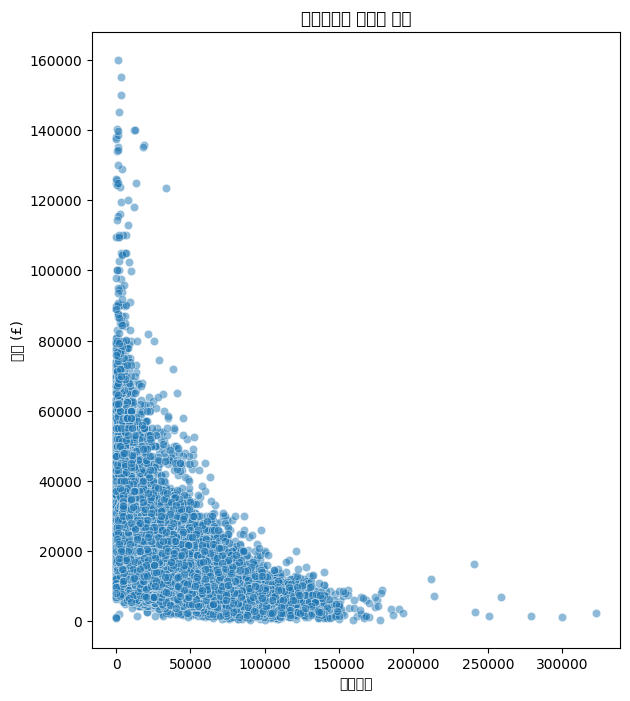

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='mileage', y='price', alpha=0.5)
plt.title('주행거리와 가격의 관계')
plt.xlabel('주행거리')
plt.ylabel('가격 (£)')

# 다항 회귀 피팅
X = df['mileage'].values.reshape(-1, 1)
y = df['price'].values
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
model = LinearRegression()
model.fit(X_poly, y)

X_plot = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
X_plot_poly = poly.transform(X_plot)
y_plot = model.predict(X_plot_poly)
plt.plot(X_plot, y_plot, 'r-', label='추세선')
plt.legend()

# 주행거리 구간별 평균 가격
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='mileage_group', y='price')
plt.title('주행거리 구간별 가격 분포')
plt.xlabel('주행거리 구간')
plt.ylabel('가격 (£)')
plt.xticks(rotation=45)
